In [51]:
import pandas as pd

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20231211/python/main/data/poly_data.csv')
df = df.iloc[:,1:]
df.head()


,length,height,width,weight
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


In [53]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], random_state=50)

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train), lr.score(X_test,y_test)

(0.9330265234721122, 0.9529720212577252)

In [55]:
lr.coef_, lr.intercept_

(array([-2.37944854, 84.87506161, 63.96408161]), -525.1228773299193)

y = ax1 + bx2 + cx3 +d

특성공학
  - 원시데이터의 유용한 특성을 추출하거나 생성하는 과정
  - 차원증가 : 새로운 특성 생성

In [56]:
# x1**2. x1*x2, x2**2, x2*x3, x3**2 x3*x1

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
poly = PolynomialFeatures()
poly.fit([[2,3]]) # 규칙적용
poly.transform([[2,3]]) # 데이터 변환
# a,b --> a^2, a*b , b^, a, b

array([[1., 2., 3., 4., 6., 9.]])

In [59]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]]) # 규칙적용
print(poly.transform([[2,3]])) # 데이터 변환
print( poly.get_feature_names_out() )

[[2. 3. 4. 6. 9.]]
['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']


In [60]:
# poly.fit(X_train)
# X_train_poly =  poly.transform(X_train)

poly = PolynomialFeatures(include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

다중 회귀 모델 훈련하기

In [61]:
# 모델선택
# 학습 fit
# 평가 score  (특성공학을 사용하지 않은 원시데이터 학습성능은 0.9529720212577252)
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
lr.score(X_train_poly,y_train), lr.score(X_test_poly,y_test)

(0.9923200507878617, 0.6904811598921108)

- 규제
  - 과적합을 피하는 방법
  - 학습률을 조금 떨어트리고 , 평가용 결과를 조금 높인다.
  - 데이터를 표준화하고 규제 알고리즘을 적용
- 규제 알고리즘 종류
  - 릿지 : L2규제
    - objective function 함수에 패널티를 적용
    - 회귀계수의 제곱합을 제한
  - 라쏘 : L1규제
    - objective function 함수에 패널티를 적용
    - 회귀계수의 절대값의 합을 제한

In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [68]:
poly = PolynomialFeatures(include_bias=False)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

릿지

In [69]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train_scaled_poly, y_train)
model.score(X_train_scaled_poly, y_train), model.score(X_test_scaled_poly, y_test)

(0.9881717145337059, 0.979515437798931)

In [70]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train_scaled_poly, y_train)
model.score(X_train_scaled_poly, y_train), model.score(X_test_scaled_poly, y_test)

(0.9884497520254075, 0.9767628389888231)

- 규제 강도조정

- 하이퍼 파라메터
  - 머신러닝의 수많은 매개변수는 성능을 결정짓는 중요 요소
    - 과연 어떤 값을 쓰면 성능이 더 좋아질까?
      - 그래서 성능을 결정짓는 파라메터를 하이퍼 파라메터
        - 최적의 값을 찾아서 적용하는 것을 하이퍼 파라메터 튜닝

In [72]:
alpha_list = [0.001,0.01,0.1,1,10,100]
train_score,test_score = [],[]

for alpha in alpha_list:
  # 릿지 모델생성
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train_scaled_poly,y_train)
  train_score.append( ridge.score(X_train_scaled_poly,y_train) )
  test_score.append( ridge.score(X_test_scaled_poly,y_test) )

In [74]:
train_score,test_score

([0.9922910867818244,
  0.9914543068442363,
  0.9892738629525513,
  0.9881717145337059,
  0.9815957111839705,
  0.8596617476146311],
 [0.7283743083566872,
  0.8700572310435811,
  0.9632920886448503,
  0.979515437798931,
  0.981303183640195,
  0.8192077889450273])

[-3. -2. -1.  0.  1.  2.]


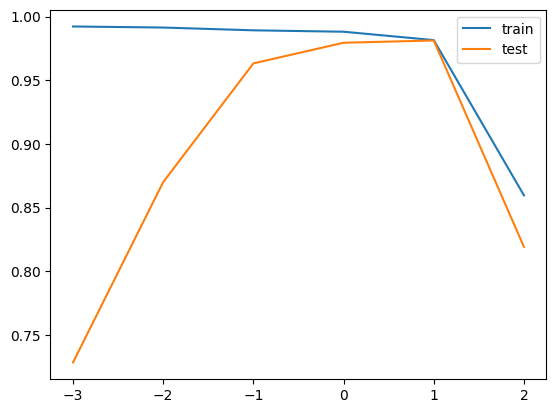

In [77]:
import matplotlib.pyplot as plt
import numpy as np
print(np.log10(alpha_list))
plt.plot(np.log10(alpha_list),train_score,label='train')
plt.plot(np.log10(alpha_list),test_score,label='test')
plt.legend()
plt.show()

In [78]:
# 위의 시각화 성능그래프를 보고 alpha는 10일때 최적을 성능을 보인다.--> 파라메터 튜닝을 한것임
# alpha = 10
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled_poly,y_train)
ridge.score(X_train_scaled_poly,y_train), ridge.score(X_test_scaled_poly,y_test)

(0.9815957111839705, 0.981303183640195)

라쏘에 대해서 하이퍼 파라메터인 alpha 규제강도를 튜닝 즉 최상의 성능을 내는 값을 찾아보세요

In [88]:
alpha_list = [1,10,100,200,300,400]
train_score,test_score = [],[]

for alpha in alpha_list:
  # 릿지 모델생성
  lasso = Lasso(alpha=alpha,max_iter=2000)
  lasso.fit(X_train_scaled_poly,y_train)
  train_score.append( lasso.score(X_train_scaled_poly,y_train) )
  test_score.append( lasso.score(X_test_scaled_poly,y_test) )

[0.         1.         2.         2.30103    2.47712125 2.60205999]


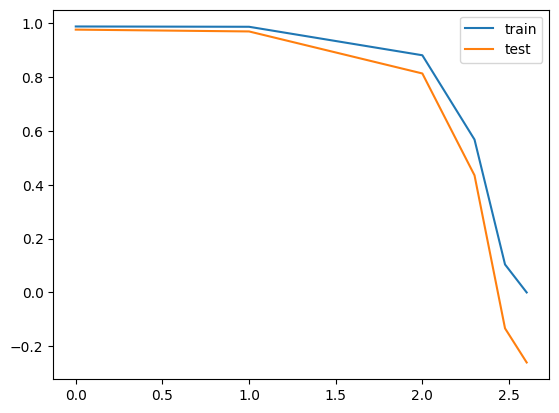

In [89]:
import matplotlib.pyplot as plt
import numpy as np
print(np.log10(alpha_list))
plt.plot(np.log10(alpha_list),train_score,label='train')
plt.plot(np.log10(alpha_list),test_score,label='test')
plt.legend()
plt.show()

In [90]:
lasso = Lasso(alpha=1. ,max_iter=2000)
lasso.fit(X_train_scaled_poly,y_train)
lasso.score(X_train_scaled_poly,y_train), lasso.score(X_test_scaled_poly,y_test)

(0.9884497520254075, 0.9767628389888231)